<a href="https://colab.research.google.com/github/arnoldofr/matydet/blob/main/Marcos_2Rz_plano_sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sympy import *
from sympy.vector import CoordSys3D
N = CoordSys3D('N')
M = N.locate_new('M', 3*N.i + 4*N.j + 5*N.k)
M.position_wrt(N)
 
#N.origin.express_coordinates(M)

3*N.i + 4*N.j + 5*N.k

In [2]:
 N.origin.express_coordinates(M)

(-3, -4, -5)

In [3]:
from sympy.vector import CoordSys3D
A=CoordSys3D('A')
A

A

In [6]:
from sympy import Symbol
theta=Symbol('theta')
beta=Symbol('beta')
alpha=Symbol('alpha')
gamma=Symbol('gamma')
theta1=Symbol('theta1')
theta2=Symbol('theta2')
theta3=Symbol('theta3')
 
theta3

theta3

In [7]:
B=A.orient_new_axis('B',alpha,A.k)
B

B

In [4]:
B.position_wrt(A)

NameError: ignored

In [8]:
B.rotation_matrix(A)

Matrix([
[ cos(alpha), sin(alpha), 0],
[-sin(alpha), cos(alpha), 0],
[          0,          0, 1]])

In [9]:
A.rotation_matrix(B)

Matrix([
[cos(alpha), -sin(alpha), 0],
[sin(alpha),  cos(alpha), 0],
[         0,           0, 1]])

In [10]:
 C=A.orient_new_axis('C',beta,A.j)
C

C

In [11]:
 D=A.orient_new_axis('D',gamma,A.i)
D

D

#Robot 2Rz en el plano
## A01 R01
## A12 R12
## A23 R23
## A34 R34
## A45 R45
## A56 R56

#Sistema o marco de referencia fijo {0}
Matriz identidad A, lo representa

In [12]:
A=CoordSys3D('A')
A

A

#Matriz de rotacion de {0} a {1}, de $$ ^0_1T $$

A01 es una matriz de rotacion alrededor del eje z en el punto $$ P_{01} $$ de coordenadas (0,0,0)

In [13]:
A01=A.orient_new_axis('A01',theta1,A.k,location=0*A.i)
A01

A01

In [14]:
A.rotation_matrix(A01)

Matrix([
[cos(theta1), -sin(theta1), 0],
[sin(theta1),  cos(theta1), 0],
[          0,            0, 1]])

In [15]:
A01.position_wrt(A)

0

In [16]:
A01.rotation_matrix(A) #inversa

Matrix([
[ cos(theta1), sin(theta1), 0],
[-sin(theta1), cos(theta1), 0],
[           0,           0, 1]])

#Matriz de rotacion de {1} a {2}, de $$ ^1_2T $$

A12 es una matriz de rotacion alrededor del eje z en el punto $$ P_{12} $$ de coordenadas (3,0,0) desde el origen de A01

In [17]:
A12=A01.orient_new_axis('A12',theta2,A01.k,location=3*A01.i)
A12

A12

In [18]:
simplify(A.rotation_matrix(A12))

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0],
[                   0,                     0, 1]])

In [19]:
simplify(A12.position_wrt(A))

3*A01.i

In [20]:
simplify(A12.origin.express_coordinates(A))

(3*cos(theta1), 3*sin(theta1), 0)

In [21]:
A12.rotation_matrix(A) # inversa

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2),  sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), 0],
[-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0],
[                                                 0,                                                  0, 1]])

In [22]:
A.position_wrt(A12)

(-3)*A01.i

#Matriz de rotacion de {2} a {3}, de $$ ^2_3T $$
A23 es una matriz de rotacion alrededor del eje z en el punto $$ P_{23} $$ de coordenadas (3,0,0) desde el origen de A12

In [23]:
 A23=A12.orient_new_axis('A23',0,A12.k,location=3*A12.i)
A23

A23

#Modelo cinematico directo de posicion a partir
de 

#Matriz de rotacion $$ ^0_3R $$

In [24]:
A03=simplify(A.rotation_matrix(A23))
A03

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), 0],
[sin(theta1 + theta2),  cos(theta1 + theta2), 0],
[                   0,                     0, 1]])

Posicion del origen {3} desde el origen {0} $$P_{03} $$

In [25]:
simplify(A23.origin.express_coordinates(A))

(-3*sin(theta1)*sin(theta2) + 3*cos(theta1)*cos(theta2) + 3*cos(theta1), 3*sin(theta1)*cos(theta2) + 3*sin(theta1) + 3*sin(theta2)*cos(theta1), 0)

#Ecuaciones cinematicas

In [26]:
print("r11 = ",A03[0,0])

r11 =  cos(theta1 + theta2)


In [27]:
print("r12 = ",A03[0,1])

r12 =  -sin(theta1 + theta2)


In [28]:
print("r13 = ",A03[0,2])

r13 =  0


In [29]:
print("r21 = ",A03[1,0])

r21 =  sin(theta1 + theta2)


In [30]:
print("r22 = ",A03[1,1])

r22 =  cos(theta1 + theta2)


In [31]:
print("r23 = ",A03[1,2])

r23 =  0


In [32]:
A23.position_wrt(A01)

3*A01.i + 3*A12.i

In [33]:
simplify(A23.rotation_matrix(A)) #su inversa

Matrix([
[ cos(theta1 + theta2), sin(theta1 + theta2), 0],
[-sin(theta1 + theta2), cos(theta1 + theta2), 0],
[                    0,                    0, 1]])

In [34]:
v01=A.origin.express_coordinates(A01)
v01

(0, 0, 0)

In [35]:
 A01.origin.express_coordinates(A12)

(-3*cos(theta2), 3*sin(theta2), 0)

In [36]:
A.origin.express_coordinates(A12)

(-3*cos(theta2), 3*sin(theta2), 0)

In [37]:
A01.origin.express_coordinates(A12)

(-3*cos(theta2), 3*sin(theta2), 0)

In [38]:
 A.origin.express_coordinates(A23)

(-3*cos(theta2) - 3, 3*sin(theta2), 0)

In [39]:
A01.origin.express_coordinates(A23)

(-3*cos(theta2) - 3, 3*sin(theta2), 0)

#Posicion del origen O12 respecto a {0}

In [40]:
d=1*2/2 # 45gr

In [41]:
v12=A12.origin.express_coordinates(A)
x12=v12[0].evalf(subs={theta1:1.57*d,theta2:1.57*d})
y12=v12[1].evalf(subs={theta1:1.57*d,theta2:1.57*d})
z12=v12[2].evalf(subs={theta1:1.57*d,theta2:1.57*d})
print(x12,y12,z12)

0.00238898013219979 2.99999904879550 0


#Posicion del origen O23 respecto a {0}

In [42]:
v23=A23.origin.express_coordinates(A)
x23=v23[0].evalf(subs={theta1:1.57*d,theta2:1.57*d})
y23=v23[1].evalf(subs={theta1:1.57*d,theta2:1.57*d})
z23=v23[2].evalf(subs={theta1:1.57*d,theta2:1.57*d})
print(x23,y23,z23)

-2.99760721505042 3.00477700754496 0


In [43]:
v12

(3*cos(theta1), 3*sin(theta1), 0)

In [44]:
v23

(-3*sin(theta1)*sin(theta2) + 3*cos(theta1)*cos(theta2) + 3*cos(theta1),
 3*sin(theta1)*cos(theta2) + 3*sin(theta1) + 3*sin(theta2)*cos(theta1),
 0)

# B matriz identidad para representar los vectores unitarios de  {0}

In [45]:
B=np.matrix([[1,0,0],[0,1,0],[0,0,1]])

#Representacion grafica de la configuracion del robot, en la cual los angulos toman los mismos valores, en un rango que inicia en 0° y llega a 90°, el incremento es de 1° y se representan todas las configuraciones.

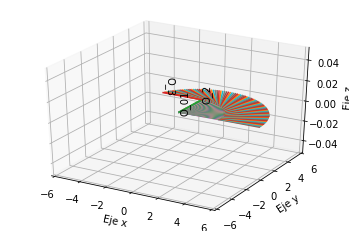

In [46]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.widgets import Slider

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.xlim(-6,6)
plt.ylim(-6,6)
#plt.zlim(0,6)
##ax.plot([1, 10], [0,1],[3,3])  # Plot some data on the axes.
#ax.plot([1, 10], [0,1],[2,2])  # Plot some data on the axes.

#ax.plot([0, A[0,0]], [0,A[0,1]],[0,A[0,2]])  # Plot some data on the axes.
#ax.plot([0, A[1,0]], [0,A[1,1]],[0,A[1,2]])  # Plot some data on the axes.
#ax.plot([0, A[2,0]], [0,A[1,2]],[0,A[2,2]])  # Plot some data on the axes.

ax.plot([0, B[0,0]], [0,B[0,1]],[0,B[0,2]])  # Plot some data on the axes.
ax.plot([0, B[1,0]], [0,B[1,1]],[0,B[1,2]])  # Plot some data on the axes.
#ax.plot([0, B[2,0]], [0,B[1,2]],[0,B[2,2]])  # Plot some data on the axes.

ax.plot([0,x12],[0,y12],[0,0],label='e1')
ax.plot([x12,x23],[y12,y23],[0,0],label='e2')

q1=np.arange(0,90)
for i in q1:
    q1d=q1[i]*pi/180
    x12=v12[0].evalf(subs={theta1:q1d,theta2:q1d})
    y12=v12[1].evalf(subs={theta1:q1d,theta2:q1d})
    z12=v12[2].evalf(subs={theta1:q1d,theta2:q1d})
    
    x23=v23[0].evalf(subs={theta1:q1d,theta2:q1d})
    y23=v23[1].evalf(subs={theta1:q1d,theta2:q1d})
    z23=v23[2].evalf(subs={theta1:q1d,theta2:q1d})
    ax.plot([0,x12],[0,y12],[0,0],label='e1')
    ax.plot([x12,x23],[y12,y23],[0,0],label='e2')
    #sleep(1)


x=np.array([0,x12,x23])
y=np.array([0,y12,y23])
z=np.array([0,z12,z23])

ax.set_xlabel('Eje x')
ax.set_ylabel('Eje y')
ax.set_zlabel('Eje z')

#ax.plot(x12,y12,z12)
#ax.scatter3D(x,y,z,zdir='z')

#ax.plot3D(x, y, z, color = "green")
ax.text3D(0,0,0,"O_01",zdir='z')
ax.text3D(x12, y12, z12,"O_2",zdir='z')
ax.text3D(x23, y23, z23,"O_3",zdir='z')
#ax.legend()

from matplotlib import rc
rc('animation', html='jshtml')

In [57]:
#@title Configuracion con los angulos theta1 y theta 2 en grados
a1 =  45#@param {type:"integer"}
a2 =  45#@param {type:"integer"}

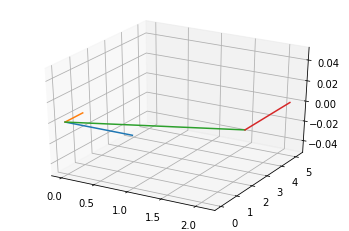

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.clear()
ax.plot([0, B[0,0]], [0,B[0,1]],[0,B[0,2]])  # Plot some data on the axes.
ax.plot([0, B[1,0]], [0,B[1,1]],[0,B[1,2]])  # Plot some data on the axes.
#ax.plot([0, B[2,0]], [0,B[1,2]],[0,B[2,2]])  # Plot some data on the axes.

q1d=a1*pi/180
q2d=a2*pi/180
x12=v12[0].evalf(subs={theta1:q1d,theta2:q2d})
y12=v12[1].evalf(subs={theta1:q1d,theta2:q2d})
z12=v12[2].evalf(subs={theta1:q1d,theta2:q2d})

x23=v23[0].evalf(subs={theta1:q1d,theta2:q2d})
y23=v23[1].evalf(subs={theta1:q1d,theta2:q2d})
z23=v23[2].evalf(subs={theta1:q1d,theta2:q2d})
ax.plot([0,x12],[0,y12],[0,0],label='e1')
ax.plot([x12,x23],[y12,y23],[0,0],label='e2')

In [ ]:
print(x)

[0 0.0523572193118505 -2.94581526174544]


In [ ]:
print(y)

[0 2.99954308546917 3.10424157557668]


In [ ]:
print(z)

[0 0 0]


#Representacion grafica de la configuracion del robot, en la cual los angulos toman los mismos valores, en un rango que inicia en 0° y llega a 90°, el incremento es de 1° y se representan una a una las configuraciones de forma animada.

In [59]:
q1=np.arange(0,90)
#Oa=np.array(3)
for i in q1:
    q1d=q1[i]*pi/180
    x12=v12[0].evalf(subs={theta1:q1d,theta2:q1d})
    y12=v12[1].evalf(subs={theta1:q1d,theta2:q1d})
    z12=v12[2].evalf(subs={theta1:q1d,theta2:q1d})

    #Oa[i]=(x12,y12,z12)
    
    x23=v23[0].evalf(subs={theta1:q1d,theta2:q1d})
    y23=v23[1].evalf(subs={theta1:q1d,theta2:q1d})
    z23=v23[2].evalf(subs={theta1:q1d,theta2:q1d})
    #print(x23,y23)

In [60]:
from matplotlib import rc
rc('animation', html='jshtml')

In [61]:
import matplotlib.animation as animation

In [62]:
ax.clear()

In [63]:
def frame(w):
    ax.clear()
    #fig = plt.figure()    
    #ax = plt.axes(projection='3d')
    plt.xlim(-6,6)
    plt.ylim(-6,6)    
    plt.title('prueba')
    ax.set_xlabel('Eje x')
    ax.set_ylabel('Eje y')
    ax.set_zlabel('Eje z')

    q1d=w*pi/180
    x12=v12[0].evalf(subs={theta1:q1d,theta2:q1d})
    y12=v12[1].evalf(subs={theta1:q1d,theta2:q1d})
    z12=v12[2].evalf(subs={theta1:q1d,theta2:q1d})
    #q1d=0
    x23=v23[0].evalf(subs={theta1:q1d,theta2:q1d})
    y23=v23[1].evalf(subs={theta1:q1d,theta2:q1d})
    z23=v23[2].evalf(subs={theta1:q1d,theta2:q1d})
    ax.set_xlim3d(-6.0,6.0)
    
    ax.set_ylim3d(-6.0,6.0)
    
    ax.set_zlim3d(-6.0,6.0)
    
    plot=ax.plot([0,x12],[0,y12],[0,0])
    plot1=ax.plot([x12,x23],[y12,y23],[0,0])
    return plot, plot1

In [65]:
anim = animation.FuncAnimation(fig, frame, frames=90, blit=False, repeat=True)

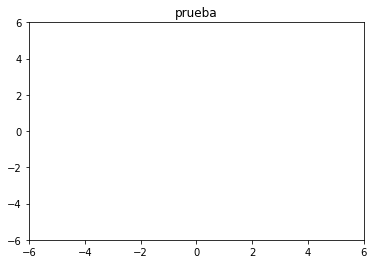

In [66]:
anim

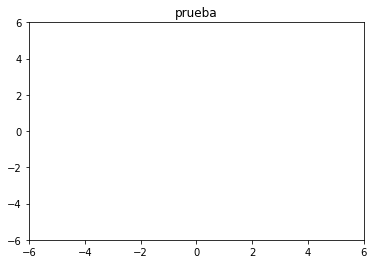

In [ ]:
anim.save('robot2gdl.mp4', writer = 'ffmpeg', fps = 30)